In [5]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [43]:
df=pd.read_csv('https://raw.githubusercontent.com/BIDDL3/PRE-PROCESSING-DATA/main/movies.dat',
            sep='::', header=None, names=['id', 'Película', 'Genere'], encoding='latin')

df.head(15)



,id,Película,Genere
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [75]:
GenereDATA = df[['Genere']]

GenereDATA = df['Genere'].str.split("|", expand = True)


#occur = GenereDATA.groupby([0,1,2,3,4,5]).size()


occur0 = GenereDATA.groupby([0]).size()
#print(occur0)

occur1 = GenereDATA.groupby([1]).size()
#print(occur1)

occur2 = GenereDATA.groupby([2]).size()
#print(occur2)

occur3 = GenereDATA.groupby([3]).size()
#print(occur3)

occur4 = GenereDATA.groupby([4]).size()
#print(occur4)

occur5 = GenereDATA.groupby([5]).size()
#print(occur5)

GenereDivided = pd.DataFrame()

GenereDivided['occur0'] = occur0
GenereDivided['occur1'] = occur1
GenereDivided['occur2'] = occur2
GenereDivided['occur3'] = occur3
GenereDivided['occur4'] = occur4
GenereDivided['occur5'] = occur5

GenereDivided.loc[:,'Total'] = GenereDivided.sum(axis=1)
GenereDivided.drop(GenereDivided.columns.difference(['Total']), 1, inplace=True)

GenereDivided.index.name = 'Genere'
GenereDivided.reset_index(inplace=True)
GenereDivided

,Genere,Total
0,Action,503.0
1,Adventure,283.0
2,Animation,105.0
3,Children's,251.0
4,Comedy,1200.0
5,Crime,211.0
6,Documentary,127.0
7,Drama,1603.0
8,Fantasy,68.0
9,Film-Noir,44.0


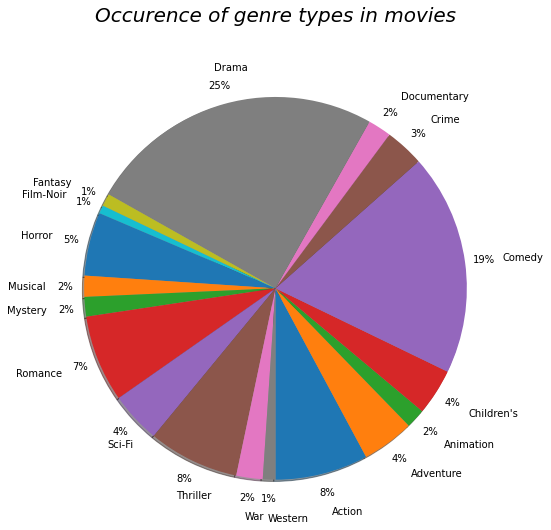

In [150]:
plt.pie(
        GenereDivided['Total'], 
        labels=GenereDivided['Genere'], 
        autopct = "%0.0f%%", 
        pctdistance = 1.1, 
        shadow =True, 
        labeldistance = 1.2, 
        startangle = 270,
        radius = 2.2, 
        counterclock = True, 
        center=(2, 3),
        rotatelabels=False
        ) 

plt.title('Occurence of genre types in movies',x=0.5, y=1.7, fontstyle='italic',fontsize=20)

plt.show()
